#Atividade da semana 8: Estudo dirigido sobre o Teorema Central do Limite
Neste notebook faremos uma verificação do enunciado do teorema central do limite (TCL - Central Limit Theorem), que pode ser enunciado como segue:

Quaisquer que sejam as distribuições de variáveis aleatórias  independentes $x_i$, a soma $\sum x_i$ é assintóticamente gaussiana, com média $m$ e desvio padrão $\sigma$, tais que $m$ é a soma das médias  e $\sigma^2$ é a soma das variâncias dos  $x_i$:

$$ m = \sum_i \bar x_i $$ 
$$ \sigma ^2 = \sum_i {\sigma_i}^2 $$ 

Abaixo, faremos a verificação da validade do TCL para uma distribuição uniforme de números aleatórios gerados entre 0 e 1.

Conforme vimos  em sala de aula, no caso de uma distribuição uniforme entre 0 e 1:

$$ \bar x = \int_0^1 x dx = 0.5 $$

$$ \sigma^2 = \int_0^1  (x-\bar x)^2 dx = \frac{1}{12} $$


Assim, de acordo com o TCL, se somarmos 12 números aleatórios entre 0 e 1, o valor resultante terá distribuição normal em torno de valor médio  $\sum_i ^{12} \bar x_i  =  12 \times 0.5 = 6.0 $  com variância  $\sigma ^2 =  12 \times \frac{1}{12} = 1$


#### A atividade desta semana consiste em repetir a verificação realizada neste notebook para outras distribuições de probabilidade disponíveis no módulo numpy.random. A listagem das distribuições pode ser encontrada em:
https://numpy.org/doc/1.16/reference/routines.random.html

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
N = 10_000_000
x = np.random.random(N) # gero números aleatórios distibuidos uniformemente entre (0,1];

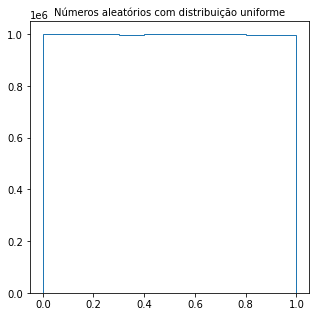

In [6]:
plt.figure(figsize=(5,5))
plt.hist(x,histtype='step') # comando para preparar histograma
plt.title('Números aleatórios com distribuição uniforme', size = 10)
plt.show()

# O gráfico abaixo comprova que a distribuição, de fato, é uniforme.

### Calculando a média e o desvio padrão da distribuição:

In [7]:
x_med_0 = np.mean(x)
x_std_0 = np.std(x)
print('Média da distribuição: ', x_med_0)
print('Desvio padrão da distribuição: ', x_std_0)

Média da distribuição:  0.49979714263289066
Desvio padrão da distribuição:  0.2886948910636173


Conforme vimos em sala de aula, o valor médio e o desvio padrão obtidos analiticamente para esta distribuição são 0.5 e 1./sqrt(12), respectivamente. Valores são confirmados pelo cálculo força bruta acima. 

### Coletando amostras da distibuição: 

In [8]:
n_samp = [2, 6, 12, 18, 30, 40, 50, 60, 70, 80, 100, 200, 300, 500, 800, 1000]

In [9]:
nomes = []
for n in n_samp:
    nome = "dist_med_" + str(n)
    medias = []
    desvios = []
    nomes.append(nome)
    print(nome, "pronto!")
    globals()[nome] = []  # crio uma lista vazia cujo nome é "dist_med_" + str(n)
    for count in range(1,100001):
        y = np.random.choice(x,n) # sorteia n números no vetor x
        globals()[nome].append(np.mean(y))  # Preencho a lista com médias sobre n números sorteados aleatóriamente da distribuição original

dist_med_2 pronto!
dist_med_6 pronto!
dist_med_12 pronto!
dist_med_18 pronto!
dist_med_30 pronto!
dist_med_40 pronto!
dist_med_50 pronto!
dist_med_60 pronto!
dist_med_70 pronto!
dist_med_80 pronto!
dist_med_100 pronto!
dist_med_200 pronto!
dist_med_300 pronto!
dist_med_500 pronto!
dist_med_800 pronto!
dist_med_1000 pronto!


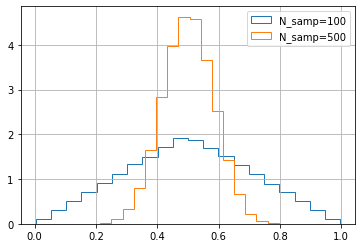

In [10]:
plt.hist(dist_med_2, histtype='step', density=True, bins=20, label='N_samp=100') 
plt.hist(dist_med_12, histtype='step', density=True, bins=20, label='N_samp=500') 
plt.legend()
plt.grid()

A inspeção de todas as amostras da distribuição demonstra que as médias convergem rapidamente para uma gaussiana.
Na célula a seguir, prepararemos os gráficos das médias e desvios padrão como função do tamanho da amostra (n_samp).

In [11]:
medias =[]
desvios = []
for nome in nomes:
    med = np.mean(globals()[nome])
    desvio = np.std(globals()[nome])
    medias.append(med)
    desvios.append(desvio)

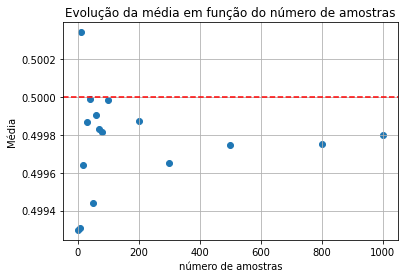

In [12]:
plt.scatter(n_samp, medias)
plt.title('Evolução da média em função do número de amostras')
plt.xlabel('número de amostras')
plt.ylabel('Média')
plt.axhline(y=0.5, c='red', ls='--') 
plt.grid()
plt.show()

### Defino a função
$$ f(x) = \frac{\sigma_0}{\sqrt{N}} $$ 

Lembre-se que esse é o desvio padrão da média de uma distribuição gaussiana.

In [18]:
def func(x):
    return x_std_0/np.sqrt(x) 

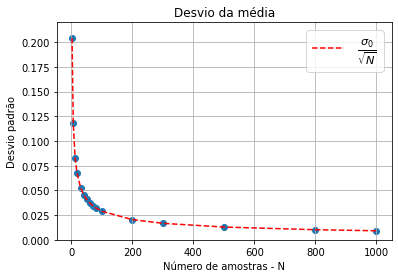

In [19]:
plt.scatter(n_samp, desvios)  # Valores obtidos das amostragens
plt.plot(n_samp, func(n_samp), ls='--', c='red', label=r'$\frac{\sigma_0}{\sqrt{N}}$')
plt.title('Desvio da média')
plt.xlabel('Número de amostras - N')
plt.ylabel('Desvio padrão')
#plt.axhline(y=0.5)
plt.ylim([0.0, 0.22])
plt.legend(fontsize=16)
plt.grid()
plt.show()

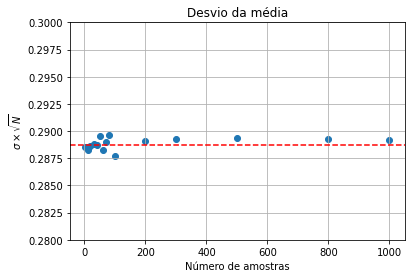

In [20]:
plt.scatter(n_samp, desvios * np.sqrt(n_samp))
plt.title('Desvio da média')
plt.xlabel('Número de amostras')
plt.ylabel(r'$\sigma \times \sqrt{N}$')
plt.axhline(y=1.0/np.sqrt(12.0), c='red', ls='--')
plt.ylim([0.28, 0.30])
plt.grid()
plt.show()

### Conclusão - 
o valor médio das amostras converge para a média da distribuição como $ \frac{\sigma}{\sqrt{N}} $, onda N é o numero de valores da amostra.

In [22]:
#globals()

## Plotando e ajustando os histogramas

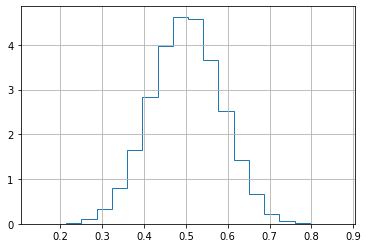

In [23]:
z=plt.hist(dist_med_12, 20, histtype='step', density=True)
plt.grid()
plt.show()

In [24]:
points=[]
for i in range(20):
    points.append(((z[1][i] + z[1][i+1])/2.0))

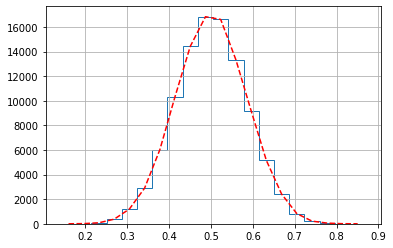

In [25]:
z=plt.hist(dist_med_12, 20, histtype='step', density=False)
plt.plot(points,z[0], ls='--', c='red')
plt.grid()
plt.show()
#plt.scatter(points,z[0])
#Cuidado! Esse plot ainda não contém o ajuste de curvas!

In [26]:
def gaussiana(x, A, x_med, sigma):
    arg = -(x-x_med)**2/(2*sigma**2)
    norm = A/(np.sqrt(2*np.pi) * sigma)
    gauss = norm * np.exp(arg)
    return gauss

In [27]:
from scipy.optimize import curve_fit

In [28]:
xdata = np.asarray(points)
ydata = np.asarray(z[0])
popt, pcov = curve_fit(gaussiana,points,ydata, p0=[1.0, 0.5, 1.0])

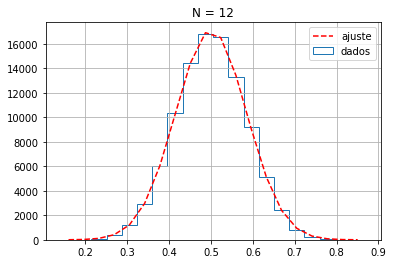

In [29]:
plt.hist(dist_med_12, 20, histtype='step', density=False, label = 'dados')
plt.plot(xdata, gaussiana(xdata, *popt), ls='--', c='red', label='ajuste') #popt: parâmetros optimizados
plt.title('N = 12')
plt.grid()
plt.legend()
plt.show()

In [30]:
sigma_0 = 1.0/12.0
print('Valor médio' , popt[1])
print('Sigma = ' , popt[2], popt[2]/sigma_0)
print('Sigma distribução=', sigma_0)

Valor médio 0.5004117610824068
Sigma =  0.08488667160510724 1.018640059261287
Sigma distribução= 0.08333333333333333
